In [ ]:
import os
# import pandas
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
mcl_path  = "/content/drive/My Drive/datasets/MCL-WiC"
patht = "/content/drive/My Drive/datasets/WiC_dataset"
train_path = "/content/drive/My Drive/datasets/MCL-WiC/training_new_format.csv"
dev_path = "/content/drive/My Drive/datasets/MCL-WiC/new_dev_wic_format.csv"
aug_path = "/content/drive/MyDrive/datasets/AuSemCor/ausemcor_supersense_pruned.csv"

In [ ]:
! ls "/content/drive/My Drive/datasets/Split_WiC_dataset"

Cosine_Sim  dev  train


In [ ]:
# Load the wic data properly everything aaaaaaa

train_wic_df = pd.read_csv("/content/drive/MyDrive/datasets/WiC_dataset/wic_train_new_format.csv")
print(train_wic_df)
train_mcl_df = pd.read_csv("/content/drive/MyDrive/datasets/final/train_rev_mcl.csv")
# train_mcl_df_temp.columns = ['id', 'lemma', 'pos', 'sent1', 'sent2', 'start1', 'end1', 'start2', 'end2', 'tag', 'position1', 'position2']
# train_mcl_df = train_mcl_df_temp[['lemma', 'pos', 'position1', 'start1', 'end1', 'position2', 'start2', 'end2', 'sent1', 'sent2', 'tag']]
print(train_mcl_df)


         lemma pos  ...                                              sent2  tag
0        carry   V  ...                    Sound carries well over water .    F
1           go   V  ...   Do you think the sofa will go through the door ?    F
2        break   V  ...  The wholesaler broke the container loads into ...    F
3          cup   N  ...            Bees filled the waxen cups with honey .    T
4      academy   N  ...                               The French Academy .    F
...        ...  ..  ...                                                ...  ...
5423     krona   N  ...    Kronas kurss — the exchange rate of the krona .    T
5424  conflict   N  ...  The conflict between the government and the re...    T
5425    answer   V  ...                                Answer a question .    T
5426      play   V  ...                                   Play the races .    T
5427  invasion   N  ...                     An invasion of mobile phones .    T

[5428 rows x 11 columns]
            le

In [ ]:
train_ausem_df = pd.read_csv("/content/drive/MyDrive/datasets/AuSemCor/ausemcor_supersense_pruned.csv").rename(columns={"sentence1":"sent1", "sentence2":"sent2"})
# train_ausem_df.columns = ['lemma', 'pos', 'sent1', 'sent2', 'start1', 'end1', 'start2', 'end2', 'tag', 'position1', 'position2' ]
print(train_ausem_df)
train_ausem_df.head()
# train_ausem_df.to_csv("/content/drive/MyDrive/datasets/AuSemCor/10jan_all_lemmas_62k", index=False)

                        id      lemma   pos  ... tag index1  index2
0      training.en-en.8000         be  VERB  ...   T      3       2
1      training.en-en.8001         be  VERB  ...   F      3       1
2      training.en-en.8002     review  NOUN  ...   T     30      13
3      training.en-en.8003     review  NOUN  ...   F     30       9
4      training.en-en.8004    benefit  NOUN  ...   T     20      26
...                    ...        ...   ...  ...  ..    ...     ...
5477  training.en-en.13477    appease  VERB  ...   F     14      18
5478  training.en-en.13478    uncover  VERB  ...   T     41       8
5479  training.en-en.13479    uncover  VERB  ...   F     41      15
5480  training.en-en.13480  subscribe  VERB  ...   T      2       8
5481  training.en-en.13481  subscribe  VERB  ...   F      2      19

[5482 rows x 12 columns]


,id,lemma,pos,sent1,sent2,start1,end1,start2,end2,tag,index1,index2
0,training.en-en.8000,be,VERB,"Position may not be everything, but in the cas...",The movie was The Great Train Robbery and its ...,17,19,10,13,T,3,2
1,training.en-en.8001,be,VERB,"Position may not be everything, but in the cas...","Seigner is the dean of the company, the oldest...",17,19,8,10,F,3,1
2,training.en-en.8002,review,NOUN,The action of the Commission in allowing or de...,Such certification shall be final and conclusi...,161,167,77,83,T,30,13
3,training.en-en.8003,review,NOUN,The action of the Commission in allowing or de...,"He opens his discourse, however, with a review...",161,167,42,48,F,30,9
4,training.en-en.8004,benefit,NOUN,"Thus, besides the training provided to youth i...",The concentration of effective power in Rabat ...,117,125,156,164,T,20,26


In [ ]:
# combine the two datasets
train_df = pd.concat([train_mcl_df, train_wic_df, train_ausem_df], ignore_index=True)
train_df = train_df[~train_df.lemma.str.contains("_")].reset_index()
print(train_df)
train_df.head()
#IDS ARE (NOT (NOT OK)) HUIHUI

       index      lemma   pos  ...                    id  index1  index2
0          0       play  NOUN  ...      training.en-en.0     NaN     NaN
1          1       play  NOUN  ...      training.en-en.1     NaN     NaN
2          2     esteem  NOUN  ...      training.en-en.2     NaN     NaN
3          3     esteem  NOUN  ...      training.en-en.3     NaN     NaN
4          4     holder  NOUN  ...      training.en-en.4     NaN     NaN
...      ...        ...   ...  ...                   ...     ...     ...
27131  27543    appease  VERB  ...  training.en-en.13477    14.0    18.0
27132  27544    uncover  VERB  ...  training.en-en.13478    41.0     8.0
27133  27545    uncover  VERB  ...  training.en-en.13479    41.0    15.0
27134  27546  subscribe  VERB  ...  training.en-en.13480     2.0     8.0
27135  27547  subscribe  VERB  ...  training.en-en.13481     2.0    19.0

[27136 rows x 15 columns]


,index,lemma,pos,position1,start1,end1,position2,start2,end2,sent1,sent2,tag,id,index1,index2
0,0,play,NOUN,11.0,69,73,2.0,10,14,In that context of coordination and integratio...,A musical play on the same subject was also st...,F,training.en-en.0,NaN,NaN
1,1,play,NOUN,11.0,69,73,22.0,112,116,In that context of coordination and integratio...,"In schools, when water is needed, it is girls ...",F,training.en-en.1,NaN,NaN
2,2,esteem,NOUN,7.0,33,39,19.0,106,112,We would also like to convey our esteem and co...,"Father Lini said that, because of that, the Un...",T,training.en-en.2,NaN,NaN
3,3,esteem,NOUN,7.0,33,39,4.0,20,26,We would also like to convey our esteem and co...,This attests to the esteem and trust enjoyed b...,T,training.en-en.3,NaN,NaN
4,4,holder,NOUN,12.0,74,81,6.0,27,33,This growth is the direct result of the increa...,A person may be either the holder of an option...,T,training.en-en.4,NaN,NaN


In [ ]:
dev_df = pd.read_csv("/content/drive/MyDrive/datasets/MCL-WiC/dev_data.csv").rename(columns={"sentence1":"sent1", "sentence2":"sent2"})

print(dev_df)
dev_df.head()

                id         lemma   pos  ... start2 end2  tag
0      dev.en-en.0      superior  NOUN  ...     41   50    F
1      dev.en-en.1      superior  NOUN  ...     44   53    T
2      dev.en-en.2  acquaintance  NOUN  ...     41   54    F
3      dev.en-en.3  acquaintance  NOUN  ...     74   86    F
4      dev.en-en.4       baggage  NOUN  ...      6   13    T
..             ...           ...   ...  ...    ...  ...  ...
995  dev.en-en.995         crash  NOUN  ...     75   80    T
996  dev.en-en.996     calculate  VERB  ...     12   22    F
997  dev.en-en.997     calculate  VERB  ...     11   21    F
998  dev.en-en.998         click  VERB  ...     92   98    T
999  dev.en-en.999         click  VERB  ...     59   66    F

[1000 rows x 10 columns]


,id,lemma,pos,sent1,sent2,start1,end1,start2,end2,tag
0,dev.en-en.0,superior,NOUN,No clause in a contract shall be interpreted a...,While fully aware that bishops and major super...,78,87,41,50,F
1,dev.en-en.1,superior,NOUN,No clause in a contract shall be interpreted a...,"In Senegal too, the customs officer and his su...",78,87,44,53,T
2,dev.en-en.2,acquaintance,NOUN,Such acquaintance is a right and not an obliga...,The complaints tend to be lodged against acqua...,5,17,41,54,F
3,dev.en-en.3,acquaintance,NOUN,Such acquaintance is a right and not an obliga...,Sexual violence by non-partners refers to viol...,5,17,74,86,F
4,dev.en-en.4,baggage,NOUN,Where any baggage of any passenger contains fi...,In my baggage I had a Hungarian grammar book a...,10,17,6,13,T


In [ ]:
dev_rev_df = dev_df.copy().rename(columns = {"sent1":"sent2", "sent2":"sent1", 'start1':'start2', 'start2':'start1', 'end1':'end2', 'end2':'end1'})
dev_df = pd.concat([dev_df, dev_rev_df], ignore_index=True)
print(dev_df)

                 id         lemma   pos  ... start2 end2  tag
0       dev.en-en.0      superior  NOUN  ...     41   50    F
1       dev.en-en.1      superior  NOUN  ...     44   53    T
2       dev.en-en.2  acquaintance  NOUN  ...     41   54    F
3       dev.en-en.3  acquaintance  NOUN  ...     74   86    F
4       dev.en-en.4       baggage  NOUN  ...      6   13    T
...             ...           ...   ...  ...    ...  ...  ...
1995  dev.en-en.995         crash  NOUN  ...    128  133    T
1996  dev.en-en.996     calculate  VERB  ...     99  109    F
1997  dev.en-en.997     calculate  VERB  ...     99  109    F
1998  dev.en-en.998         click  VERB  ...     32   39    T
1999  dev.en-en.999         click  VERB  ...     32   39    F

[2000 rows x 10 columns]


In [ ]:
# test data load chinese
test_df = pd.read_csv("/content/drive/MyDrive/datasets/WiC_dataset/norm_wic_dev_new_format.csv").rename(columns={"sentence1":"sent1", "sentence2":"sent2"})

# test_df_zr = pd.read_csv('/content/drive/My Drive/datasets/MCL_WiC_old_format/zr+mcl+wic_dev_and_test/zr_test_df.csv')
# test_df = test_df_zr[test_df.columns]
test_df.head()
# test_wic = pd.read_csv('/content/drive/MyDrive/datasets/WiC_dataset/wic_dev_new_format.csv')
# test_wic = test_wic[test_df.columns]
# test_df =  pd.concat([test_df, test_wic], ignore_index=True)
print(test_df)



           lemma pos  ...                                              sent2  tag
0          board   N  ...               He nailed boards across the windows.    F
1      circulate   V  ...  This letter is being circulated among the facu...    F
2           hook   V  ...  He hooked a snake accidentally, and was so sca...    T
3     recreation   N  ...  Drug abuse is often regarded as a form of recr...    T
4    domesticity   N  ...  A royal family living in unpretentious domesti...    F
..           ...  ..  ...                                                ...  ...
633         base   N  ...  Bases include oxides and hydroxides of metals ...    F
634        power   N  ...          The mysterious presence of an evil power.    F
635  portmanteau   N  ...  ` motel ' is a portmanteau word made by combin...    T
636      promise   V  ...                       I promised somebody my time.    T
637       pierce   V  ...                       The path pierced the jungle.    F

[638 rows x 11 

In [ ]:
wdf = pd.concat([test_df,train_wic_df])


In [ ]:
test_df.shape

(638, 11)

In [ ]:
!nvidia-smi

Thu Jan 28 18:06:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla V100-SXM2-16GB


In [ ]:
!pip install transformers

     |████████████████████████████████| 1.8MB 14.6MB/s 
     |████████████████████████████████| 890kB 45.1MB/s 
     |████████████████████████████████| 2.9MB 47.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=ae8a1f443a0f4b622ff66fdc18e3ae0c6ca1f784fcd7e142095355ee674716ab
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import ElectraTokenizerFast

# Load the BERT tokenizer.
print('Loading ernie tokenizer...')
tokenizer = ElectraTokenizerFast.from_pretrained("google/electra-large-discriminator")


Loading ernie tokenizer...


In [ ]:
# sentences is a list 0f str

# Adding a signal without spaces
train_sentences_1 =  []
train_sentences_2 = []

dev_sentences_1 =  []
dev_sentences_2 = []

test_sentences_1 = []
test_sentences_2 = []

list_train_sentences_1 = list(train_df['sent1'])
list_train_sentences_2 = list(train_df['sent2'])

list_dev_sentences_1 =  list(dev_df['sent1'])
list_dev_sentences_2 = list(dev_df['sent2'])

list_test_sentences_1 =  list(test_df['sent1'])
list_test_sentences_2 = list(test_df['sent2'])

for i in range(len(list_train_sentences_1)):
  sentence_1 = list_train_sentences_1[i]
  # print(sentence_1)
  try:
    s1 = int(train_df['start1'][i])
  except:
    print(train_df['start1'][i])
    hvl
  e1 = int(train_df['end1'][i])
  sentence_1 = sentence_1[:s1]+'"'+sentence_1[s1:e1]+'"'+ sentence_1[e1:]
  train_sentences_1.append(sentence_1)

  sentence_2 = list_train_sentences_2[i]
  # print(sentence_2)
  s2 = int(train_df['start2'][i])
  e2 = int(train_df['end2'][i])
  sentence_2 = sentence_2[:s2]+'"'+sentence_2[s2:e2]+'"'+ sentence_2[e2:]
  train_sentences_2.append(sentence_2)
  # print((train_sentences_1[i], train_sentences_2[i]))

for i in range(len(list_dev_sentences_1)):
  d_sentence_1 = list_dev_sentences_1[i]
  # print(dev_data_df['start1'][i])
  s1 = int(dev_df['start1'][i])
  e1 = int(dev_df['end1'][i])
  d_sentence_1 = d_sentence_1[:s1]+'"'+d_sentence_1[s1:e1]+'"'+ d_sentence_1[e1:]
  dev_sentences_1.append(d_sentence_1)

  d_sentence_2 = list_dev_sentences_2[i]
  s2 = int(dev_df['start2'][i])
  e2 = int(dev_df['end2'][i])
  d_sentence_2 = d_sentence_2[:s2]+'"'+d_sentence_2[s2:e2]+'"'+ d_sentence_2[e2:]
  dev_sentences_2.append(d_sentence_2)

for i in range(len(list_test_sentences_1)):
  d_sentence_1 = list_test_sentences_1[i]
  s1 = int(test_df['start1'][i])
  e1 = int(test_df['end1'][i])
  d_sentence_1 = d_sentence_1[:s1]+'"'+d_sentence_1[s1:e1]+'"'+ d_sentence_1[e1:]
  test_sentences_1.append(d_sentence_1)

  d_sentence_2 = list_test_sentences_2[i]
  s2 = int(test_df['start2'][i])
  e2 = int(test_df['end2'][i])
  d_sentence_2 = d_sentence_2[:s2]+'"'+d_sentence_2[s2:e2]+'"'+ d_sentence_2[e2:]
  test_sentences_2.append(d_sentence_2)

  # print((dev_sentences_1[i], dev_sentences_2[i]))

print((train_sentences_2[:10]))
print((train_sentences_1[:10]))
print(dev_sentences_1[:10])
print(dev_sentences_2[:10])
print(test_sentences_1[:10])
print(test_sentences_2[:10])

In [ ]:
lenths = []
for i in range(len(train_sentences_1)):
  e_inp = tokenizer(train_sentences_1[i:i+1], train_sentences_2[i:i+1], padding = True, truncation = True)
  l = len(e_inp['input_ids'][0])
  lenths.append(l)
  # print(e_inp['input_ids'])
  # kjv

In [ ]:
print(len(lenths))

27136


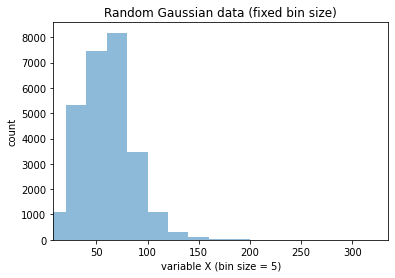

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = np.array(lenths)
# fixed bin size
bins = np.arange(0, 600, 20) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [ ]:
print(len(data))

27136


In [ ]:
(data>160).astype(int).sum()

84

In [ ]:
train_df = train_df.iloc[data<=160,:].reset_index()

In [ ]:
train_df['tag'].value_counts()

F    13463
T    13456
Name: tag, dtype: int64

In [ ]:
# sentences is a list 0f str

# Adding a signal without spaces
train_sentences_1 =  []
train_sentences_2 = []

dev_sentences_1 =  []
dev_sentences_2 = []

test_sentences_1 = []
test_sentences_2 = []

list_train_sentences_1 = list(train_df['sent1'])
list_train_sentences_2 = list(train_df['sent2'])

list_dev_sentences_1 =  list(dev_df['sent1'])
list_dev_sentences_2 = list(dev_df['sent2'])

list_test_sentences_1 =  list(test_df['sent1'])
list_test_sentences_2 = list(test_df['sent2'])

for i in range(len(list_train_sentences_1)):
  sentence_1 = list_train_sentences_1[i]
  # print(sentence_1)
  try:
    s1 = int(train_df['start1'][i])
  except:
    print(train_df['start1'][i])
    hvl
  e1 = int(train_df['end1'][i])
  sentence_1 = sentence_1[:s1]+'"'+sentence_1[s1:e1]+'"'+ sentence_1[e1:]
  train_sentences_1.append(sentence_1)

  sentence_2 = list_train_sentences_2[i]
  # print(sentence_2)
  s2 = int(train_df['start2'][i])
  e2 = int(train_df['end2'][i])
  sentence_2 = sentence_2[:s2]+'"'+sentence_2[s2:e2]+'"'+ sentence_2[e2:]
  train_sentences_2.append(sentence_2)
  # print((train_sentences_1[i], train_sentences_2[i]))

for i in range(len(list_dev_sentences_1)):
  d_sentence_1 = list_dev_sentences_1[i]
  # print(dev_data_df['start1'][i])
  s1 = int(dev_df['start1'][i])
  e1 = int(dev_df['end1'][i])
  d_sentence_1 = d_sentence_1[:s1]+'"'+d_sentence_1[s1:e1]+'"'+ d_sentence_1[e1:]
  dev_sentences_1.append(d_sentence_1)

  d_sentence_2 = list_dev_sentences_2[i]
  s2 = int(dev_df['start2'][i])
  e2 = int(dev_df['end2'][i])
  d_sentence_2 = d_sentence_2[:s2]+'"'+d_sentence_2[s2:e2]+'"'+ d_sentence_2[e2:]
  dev_sentences_2.append(d_sentence_2)

for i in range(len(list_test_sentences_1)):
  d_sentence_1 = list_test_sentences_1[i]
  s1 = int(test_df['start1'][i])
  e1 = int(test_df['end1'][i])
  d_sentence_1 = d_sentence_1[:s1]+'"'+d_sentence_1[s1:e1]+'"'+ d_sentence_1[e1:]
  test_sentences_1.append(d_sentence_1)

  d_sentence_2 = list_test_sentences_2[i]
  s2 = int(test_df['start2'][i])
  e2 = int(test_df['end2'][i])
  d_sentence_2 = d_sentence_2[:s2]+'"'+d_sentence_2[s2:e2]+'"'+ d_sentence_2[e2:]
  test_sentences_2.append(d_sentence_2)

  # print((dev_sentences_1[i], dev_sentences_2[i]))

print((train_sentences_2[:10]))
print((train_sentences_1[:10]))
print(dev_sentences_1[:10])
print(dev_sentences_2[:10])
print(test_sentences_1[:10])
print(test_sentences_2[:10])

['A musical "play" on the same subject was also staged in Kathmandu for three days.', 'In schools, when water is needed, it is girls who are sent to fetch it, taking time away from their studies and "play".', 'Father Lini said that, because of that, the United Nations has a very special place in the affections and "esteem" of the people of Vanuatu.', 'This attests to the "esteem" and trust enjoyed by your country.', 'A person may be either the "holder" of an option, being the person entitled to buy or sell; or the writer of the option, being the person required to honour the holder’s right to buy or sell.', 'Over 5,000 now hold legal immigrant documents, which, after five years of annual renewal, entitles the "holder" to apply for permanent residence.', 'The conclusion of the first "reading" would make it possible to begin negotiations on a streamlined text.', 'It was precisely that consideration which led the Commission on first "reading" to introduce a special regime of compulsory ar

In [ ]:
encoded_inputs_train = tokenizer(train_sentences_1, train_sentences_2, padding = True, truncation = True, return_tensors = 'pt', return_offsets_mapping=True)
print(len(encoded_inputs_train['input_ids'][0]))
print(type(encoded_inputs_train['input_ids']))

encoded_inputs_train_rev = tokenizer(train_sentences_2, train_sentences_1, padding = True, truncation = True, return_tensors = 'pt', return_offsets_mapping=True)


encoded_inputs_dev = tokenizer(dev_sentences_1, dev_sentences_2, padding = True, truncation = True, return_tensors = 'pt', return_offsets_mapping=True)
print(len(encoded_inputs_dev['input_ids'][0]))
print(type(encoded_inputs_dev['input_ids']))

encoded_inputs_test = tokenizer(test_sentences_1, test_sentences_2, padding = True, truncation = True, return_tensors = 'pt', return_offsets_mapping=True)

print(test_sentences_1[2])
print(test_sentences_2[2])
print((encoded_inputs_test['offset_mapping'][2]))
print((encoded_inputs_test['input_ids'][2]))

160
<class 'torch.Tensor'>
133
<class 'torch.Tensor'>
"Hook" a fish.
He "hooked" a snake accidentally, and was so scared he dropped his rod into the water.
tensor([[ 0,  0],
        [ 0,  1],
        [ 1,  5],
        [ 5,  6],
        [ 7,  8],
        [ 9, 13],
        [13, 14],
        [ 0,  0],
        [ 0,  2],
        [ 3,  4],
        [ 4, 10],
        [10, 11],
        [12, 13],
        [14, 19],
        [20, 32],
        [32, 33],
        [34, 37],
        [38, 41],
        [42, 44],
        [45, 51],
        [52, 54],
        [55, 62],
        [63, 66],
        [67, 70],
        [71, 75],
        [76, 79],
        [80, 85],
        [85, 86],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0],
        [ 0,  0]

In [ ]:
def check_end(offsets, i, e):
  d = offsets[i][0]

  for j in range(i, len(offsets)):
    a = offsets[j][0]
    b = offsets[j][1]

    if (b==e):
      return True
    
    if (a == d):
      d = b
      continue
    else:
      return False
  return False


In [ ]:
# create wordpeice indices of the words of interest now
# be aware, that due to signal the actual token have their positions offsetted
train_pos_1 = []
train_pos_2 = []

for j in range(len(train_sentences_1)):
  offsets = encoded_inputs_train['offset_mapping'][j].detach().numpy()
  second_sent = False
  s1 = int(train_df['start1'][j])
  s2 = int(train_df['start2'][j])
  e1 = int(train_df['end1'][j])
  e2 = int(train_df['end2'][j])
  pos1 = -1
  pos2 = -1
  for i, offset in enumerate(offsets):
    if i == 0:
      continue #cls
    if offset[1] == 0:
      second_sent = True

    if offset[0] == s1+1 and second_sent == False:
      if check_end(offsets, i, e1+1):
        pos1 = i
    elif offset[0] == s2+1 and second_sent == True:
      if check_end(offsets, i, e2+1):
        pos2 = i
        break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1 and second_sent == False:
        if check_end(offsets, i, e1):
          pos1 = i
      elif offset[0] == s2 and second_sent == True:
        if check_end(offsets, i, e2):
          pos2 = i
          break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1-1 and second_sent == False:
        if check_end(offsets, i, e1-1):
          pos1 = i
      elif offset[0] == s2-1 and second_sent == True:
        if check_end(offsets, i, e2-1):
          pos2 = i
          break

  # if pos1 == -1 or pos2 ==-1:
  #   second_sent = False
  #   for i, offset in enumerate(offsets):
  #     if i == 0:
  #       continue #cls
  #     if offset[1] == 0:
  #       second_sent = True

  #     if offset[0] == s1-2 and second_sent == False:
  #       if check_end(offsets, i, e1-2):
  #         pos1 = i
  #     elif offset[0] == s2-2 and second_sent == True:
  #       if check_end(offsets, i, e2-2):
  #         pos2 = i
  #         break
  train_pos_1.append(pos1)
  train_pos_2.append(pos2)
# print(train_pos_1)
# print(train_pos_2)

dev_pos_1 = []
dev_pos_2 = []

for j in range(len(dev_sentences_1)):
  offsets = encoded_inputs_dev['offset_mapping'][j].detach().numpy()
  second_sent = False
  s1 = int(dev_df['start1'][j])
  s2 = int(dev_df['start2'][j])
  e1 = int(dev_df['end1'][j])
  e2 = int(dev_df['end2'][j])
  pos1 = -1
  pos2 = -1
  for i, offset in enumerate(offsets):
    if i == 0:
      continue #cls
    if offset[1] == 0:
      second_sent = True

    if offset[0] == s1+1 and second_sent == False:
      if check_end(offsets, i, e1+1):
        pos1 = i
    elif offset[0] == s2+1 and second_sent == True:
      if check_end(offsets, i, e2+1):
        pos2 = i
        break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1 and second_sent == False:
        if check_end(offsets, i, e1):
          pos1 = i
      elif offset[0] == s2 and second_sent == True:
        if check_end(offsets, i, e2):
          pos2 = i
          break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1-1 and second_sent == False:
        if check_end(offsets, i, e1-1):
          pos1 = i
      elif offset[0] == s2-1 and second_sent == True:
        if check_end(offsets, i, e2-1):
          pos2 = i
          break


  dev_pos_1.append(pos1)
  dev_pos_2.append(pos2)

test_pos_1 = []
test_pos_2 = []

for j in range(len(test_sentences_1)):
  offsets = encoded_inputs_test['offset_mapping'][j].detach().numpy()
  second_sent = False
  s1 = int(test_df['start1'][j])
  s2 = int(test_df['start2'][j])
  e1 = int(test_df['end1'][j])
  e2 = int(test_df['end2'][j])
  pos1 = -1
  pos2 = -1
  for i, offset in enumerate(offsets):
    if i == 0:
      continue #cls
    if offset[1] == 0:
      second_sent = True

    if offset[0] == s1+1 and second_sent == False:
      if check_end(offsets, i, e1+1):
        pos1 = i
    elif offset[0] == s2+1 and second_sent == True:
      if check_end(offsets, i, e2+1):
        pos2 = i
        break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1 and second_sent == False:
        if check_end(offsets, i, e1):
          pos1 = i
      elif offset[0] == s2 and second_sent == True:
        if check_end(offsets, i, e2):
          pos2 = i
          break
  if pos1 == -1 or pos2 ==-1:
    second_sent = False
    for i, offset in enumerate(offsets):
      if i == 0:
        continue #cls
      if offset[1] == 0:
        second_sent = True

      if offset[0] == s1-1 and second_sent == False:
        if check_end(offsets, i, e1-1):
          pos1 = i
      elif offset[0] == s2-1 and second_sent == True:
        if check_end(offsets, i, e2-1):
          pos2 = i
          break
  test_pos_1.append(pos1)
  test_pos_2.append(pos2)
print(dev_pos_1[:100])
print(dev_pos_2[800:810])
print(test_pos_1[:10])
print(len(test_pos_2))

train_pos_1 = torch.LongTensor(train_pos_1)
train_pos_2 = torch.LongTensor(train_pos_2)

train_pos = torch.stack((train_pos_1, train_pos_2), dim =1)

dev_pos_1 = torch.LongTensor(dev_pos_1)
dev_pos_2 = torch.LongTensor(dev_pos_2)

dev_pos = torch.stack((dev_pos_1, dev_pos_2), dim=1)

test_pos_1 = torch.LongTensor(test_pos_1)
test_pos_2 = torch.LongTensor(test_pos_2)

test_pos = torch.stack((test_pos_1, test_pos_2), dim=1)

[16, 16, 3, 3, 4, 4, 7, 7, 11, 11, 13, 13, 9, 9, 17, 17, 8, 8, 9, 9, 8, 8, 7, 7, 8, 8, 18, 18, 13, 13, 40, 40, 21, 21, 6, 6, 25, 25, 62, 62, 18, 18, 10, 10, 10, 10, 9, 9, 11, 11, 3, 3, 13, 13, 6, 6, 9, 9, 7, 7, 12, 12, 6, 6, 11, 11, 20, 20, 29, 29, 27, 27, 35, 35, 14, 14, 15, 15, 10, 10, 7, 7, 17, 17, 6, 6, 3, 3, 3, 3, 23, 23, 15, 15, 7, 7, 11, 11, 15, 15]
[55, 51, 35, 59, 35, 52, 43, 40, 39, 45]
[4, 2, 2, 3, 6, 6, 5, 6, 8, 9]
638


In [ ]:
print(tokenizer.encode('Hi there you fool.'))
print(tokenizer.encode('Hi there "you" fool.'))

[101, 7632, 2045, 2017, 7966, 1012, 102]
[101, 7632, 2045, 1000, 2017, 1000, 7966, 1012, 102]


In [ ]:
# print(train_pos_1[:20])
# print(train_pos_2[:20])

# print(train_pos_1[8000:8020])
# print(train_pos_2[8000:8020])
# print(len(train_pos_1))

In [ ]:
# labels = torch.from_numpy(train_gold_df['label'].values)
train_gold_df_tmp = train_df[['tag']].replace({'F' : 0, 'T' : 1})
train_labels = torch.from_numpy(train_gold_df_tmp.values)
print(train_labels)

dev_gold_df_tmp = dev_df[['tag']].replace({'F' : 0, 'T' : 1})
dev_labels = torch.from_numpy(dev_gold_df_tmp.values)

test_gold_df_tmp = test_df[['tag']].replace({'F' : 0, 'T' : 1})
test_labels = torch.from_numpy(test_gold_df_tmp.values)
print(len(test_labels))

tensor([[0],
        [0],
        [1],
        ...,
        [1],
        [0],
        [1]])
638


In [ ]:
from torch.utils.data import TensorDataset

# Combine the training inputs into a TensorDataset.
train_dataset = TensorDataset(encoded_inputs_train['input_ids'], encoded_inputs_train['token_type_ids'],
                              encoded_inputs_train['attention_mask'], train_pos, train_labels)


dev_dataset = TensorDataset(encoded_inputs_dev['input_ids'], encoded_inputs_dev['token_type_ids'],
                              encoded_inputs_dev['attention_mask'], dev_pos, dev_labels)

test_dataset = TensorDataset(encoded_inputs_test['input_ids'], encoded_inputs_test['token_type_ids'],
                              encoded_inputs_test['attention_mask'], test_pos, test_labels)


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 16

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )


# For validation the order doesn't matter, so we'll just read them sequentially.
dev_dataloader = DataLoader(
            dev_dataset, # The validation samples.
            sampler = SequentialSampler(dev_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

**CUTOFF**

In [ ]:
from transformers import ElectraModel, AdamW, BertConfig
import torch.nn as nn

class BERTi(nn.Module):

    def __init__(self):
        super(BERTi, self).__init__()

        options_name = "google/electra-large-discriminator"
        hidden_states = False
        self.encoder = ElectraModel.from_pretrained(options_name, output_hidden_states = hidden_states, return_dict = False)

    def forward(self, input_ids, token_type_ids, attention_mask):
        last_layer = self.encoder(input_ids = input_ids, token_type_ids = token_type_ids, attention_mask = attention_mask)[0]

        return last_layer

In [ ]:
class Logistic_Reg(nn.Module):

  def __init__(self):
    super(Logistic_Reg, self).__init__()

    self.fc1 = nn.Linear(2048, 1)

  def forward(self, x):
    x = self.fc1(x)

    return x

In [ ]:
model_bert = BERTi().to(device)
model_log_reg = Logistic_Reg().to(device)


In [ ]:
# model_bert.load_state_dict(torch.load("/content/drive/MyDrive/Model Analysis/Ausemcor/ernie_large_ausem_small_wic/model_bert_dev_best_dev_X_test_X_mcl_and_wic"))
# model_log_reg.load_state_dict(torch.load("/content/drive/MyDrive/Model Analysis/Ausemcor/ernie_large_ausem_small_wic/model_log_reg_dev_bestdev_X_test_X_mcl_and_wic"))

In [ ]:
optimizer = AdamW(list(model_bert.parameters()) + list(model_log_reg.parameters()),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 1e-5
                  eps = 1e-8 ,
                  # weight_decay = 1 # args.adam_epsilon  - default is 1e-8.
                  )

# scheduler??


In [ ]:
def loss_fn(output, targets):
  return nn.BCEWithLogitsLoss(reduction='mean')(output, targets)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    print(pred_flat)
    print(labels_flat)
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def flat_accuracy_single_logit(preds, labels):
    pred_flat = (preds>0).flatten()
    labels_flat = labels.flatten()
    # print(pred_flat)
    # print(labels_flat)
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def flat_accuracy_single_logit_avg(preds, labels, m):
    pred_flat = (1/(1+np.exp(-preds))).flatten()
    labels_flat = labels.flatten()
    # print(pred_flat)
    # print(labels_flat)
    return np.sum(((pred_flat[:m]+pred_flat[m:])>1).astype(int) == labels_flat) / len(labels_flat)

In [ ]:
def cross_entropy(predictions, targets):
    N = predictions.shape[0]
    predictions = 1/(1+np.exp(-predictions))
    ce = -np.sum(targets * np.log(predictions) + (1-targets) * np.log(1-predictions)) / N
    return ce

def cross_entropy_avg(predictions, targets,m):
    N = predictions.shape[0]
    predictions = 1/(1+np.exp(-predictions))
    predictions = (predictions[:m]+predictions[m:])/2
    ce = -np.sum(targets * np.log(predictions) + (1-targets) * np.log(1-predictions)) / N
    return ce

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
path_this = "/content/drive/MyDrive/SemEval Models b/English/electra_mcl_rev_wic_t_ausem"


In [ ]:
accumulation_steps = 1

In [ ]:
# import random
# import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()
epochs = 12
best_val_accuracy_n = 0
best_val_accuracy_avg = 0
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model_bert.train()
    model_log_reg.train()

    if True:
      # For each batch of training data...
      for step, batch in enumerate(train_dataloader):
          # if step == 0:
          #   break

          # Progress update every 40 batches.
          if step % 100 == 0 and not step == 0:
              # Calculate elapsed time in minutes.
              elapsed = format_time(time.time() - t0)
              
              # Report progress.
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

          if (step == int(len(train_dataloader)/5) or step == int(2*len(train_dataloader)/5) or step == int(3*len(train_dataloader)/5)
          or step == int(4*len(train_dataloader)/5)):
            print("")
            print("Running Validation...")

            t0 = time.time()

            # Put the model in evaluation mode--the dropout layers behave differently
            # during evaluation.
            model_bert.eval()
            model_log_reg.eval()

            # Tracking variables 
            total_eval_accuracy = 0
            total_eval_loss = 0
            nb_eval_steps = 0

            t_labels = []
            t_preds = []

            # Evaluate data for one epoch
            for atch in dev_dataloader:
                
                # Unpack this training batch from our dataloader. 
                #
                # As we unpack the batch, we'll also copy each tensor to the GPU using 
                # the `to` method.

                b_input_ids = atch[0].to(device)
                b_token_type_ids = atch[1].to(device)
                b_attention_mask = atch[2].to(device)
                b_poses = atch[3].to(device)
                b_labels = atch[4].to(device)
                
                # Tell pytorch not to bother with constructing the compute graph during
                # the forward pass, since this is only needed for backprop (training).
                with torch.no_grad():        

                    last_layer = model_bert(b_input_ids, b_token_type_ids, b_attention_mask)
                    b_poses = b_poses.unsqueeze(-1).repeat(1, 1, 1024)
                    gathered_activations = torch.gather(last_layer, 1, b_poses)
                    logits = model_log_reg(gathered_activations.view(gathered_activations.size()[0], -1))
                    loss = loss_fn(logits, b_labels.type_as(logits))
                    
                # Accumulate the validation loss.
                total_eval_loss += loss.item()

                # Move logits and labels to CPU
                logits = logits.cpu().detach().numpy()
                # print(logits)
                label_ids = b_labels.cpu().numpy()

                t_labels.append(label_ids)
                t_preds.append(logits)
                

            all_dev_labels = np.concatenate(t_labels, axis=0)
            all_dev_logits = np.concatenate(t_preds, axis=0)
            # Report the final accuracy for this validation run.
            # print(all_dev_logits)
            avg_val_accuracy_n = flat_accuracy_single_logit(all_dev_logits[:1000], all_dev_labels[:1000])
            print("Normal Validation Accuracy: {0:.4f}".format(avg_val_accuracy_n))

            # Calculate the average loss over all of the batches.
            # avg_val_loss = total_eval_loss / len(dev_dataloader)
            print("   Normal Validation Loss: {0:.3f}".format(cross_entropy(all_dev_logits[:1000], all_dev_labels[:1000])))

            avg_val_accuracy_avg = flat_accuracy_single_logit_avg(all_dev_logits, all_dev_labels[:1000], 1000)
            print("Rev Avg Validation Accuracy: {0:.4f}".format(avg_val_accuracy_avg))

            # Calculate the average loss over all of the batches.
            # avg_val_loss = total_eval_loss / len(dev_dataloader)
            print("   Rev Avg Validation Loss: {0:.3f}".format(cross_entropy_avg(all_dev_logits, all_dev_labels[:1000], 1000)))
            
            # Measure how long the validation run took.
            validation_time = format_time(time.time() - t0)

            if(avg_val_accuracy_n > best_val_accuracy_n):
              # flag = True
              best_val_accuracy_n = avg_val_accuracy_n
              best_val_preds = all_dev_logits
              np.save(os.path.join(path_this, "dev_preds_normal"), best_val_preds)
              # best_bert_parameters = model_bert.state_dict()
              # best_log_reg_parameters = model_log_reg.state_dict()    
              torch.save(model_bert.state_dict(), os.path.join(path_this, "normal_model_bert_dev_best"))
              torch.save(model_log_reg.state_dict(), os.path.join(path_this, "normal_model_log_reg_dev_best"))

            if(avg_val_accuracy_avg > best_val_accuracy_avg):
              # flag = True
              best_val_accuracy_avg = avg_val_accuracy_avg
              best_val_preds = all_dev_logits
              np.save(os.path.join(path_this, "rev_avg_dev_preds"), best_val_preds)
              # best_bert_parameters = model_bert.state_dict()
              # best_log_reg_parameters = model_log_reg.state_dict()    
              torch.save(model_bert.state_dict(), os.path.join(path_this, "rev_avg_model_bert_dev_best"))
              torch.save(model_log_reg.state_dict(), os.path.join(path_this, "rev_avg_model_log_reg_dev_best"))
            
            # print("  Validation Loss: {0:.3f}".format(avg_val_loss))
            print("  Validation took: {:}".format(validation_time))

            model_bert.train()
            model_log_reg.train()


          # Unpack this training batch from our dataloader. 
          #
          # As we unpack the batch, we'll also copy each tensor to the GPU using the 
          # `to` method.

          b_input_ids = batch[0].to(device)
          b_token_type_ids = batch[1].to(device)
          b_attention_mask = batch[2].to(device)
          b_poses = batch[3].to(device)
          b_labels = batch[4].to(device)

          if step%accumulation_steps == 0:
            optimizer.zero_grad()        

          # Perform a forward pass (evaluate the model on this training batch).
          # The documentation for this `model` function is here: 
          # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
          # It returns different numbers of parameters depending on what arguments
          # arge given and what flags are set. For our useage here, it returns
          # the loss (because we provided labels) and the "logits"--the model
          # outputs prior to activation.
          last_layer = model_bert(b_input_ids, b_token_type_ids, b_attention_mask)

          # print(b_poses[:,0].size())
          b_poses = b_poses.unsqueeze(-1).repeat(1, 1, 1024)
          # print(b_poses.size())
          gathered_activations = torch.gather(last_layer, 1, b_poses)

          # concatted = torch.cat((last_layer[b_poses[:,0].view(16,1),:] , last_layer[:,b_poses[:,1],:]), dim = 1)

          logits = model_log_reg(gathered_activations.view(gathered_activations.size()[0], -1))
          # print(type(b_labels))
          loss = loss_fn(logits, b_labels.type_as(logits))
          loss = loss/accumulation_steps
          # print("loss = "+str(loss))
          # print(logits.cpu().detach().numpy())

          # Accumulate the training loss over all of the batches so that we can
          # calculate the average loss at the end. `loss` is a Tensor containing a
          # single value; the `.item()` function just returns the Python value 
          # from the tensor.
          
          # print(loss)
          total_train_loss += loss.item()

          # Perform a backward pass to calculate the gradients.
          loss.backward()

          # Clip the norm of the gradients to 1.0.
          # This is to help prevent the "exploding gradients" problem.
          # TODO logsistic REG????/
          if (step%accumulation_steps == (accumulation_steps-1)):
            torch.nn.utils.clip_grad_norm_(model_bert.parameters(), 1.0)
            optimizer.step()

          # # Update the learning rate.
          # scheduler.step()
        
    

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model_bert.eval()
    model_log_reg.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    t_labels = []
    t_preds = []

    # Evaluate data for one epoch
    for batch in dev_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.

        b_input_ids = batch[0].to(device)
        b_token_type_ids = batch[1].to(device)
        b_attention_mask = batch[2].to(device)
        b_poses = batch[3].to(device)
        b_labels = batch[4].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            last_layer = model_bert(b_input_ids, b_token_type_ids, b_attention_mask)
            b_poses = b_poses.unsqueeze(-1).repeat(1, 1, 1024)
            gathered_activations = torch.gather(last_layer, 1, b_poses)
            logits = model_log_reg(gathered_activations.view(gathered_activations.size()[0], -1))
            loss = loss_fn(logits, b_labels.type_as(logits))
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.cpu().detach().numpy()
        # print(logits)
        label_ids = b_labels.cpu().numpy()

        t_labels.append(label_ids)
        t_preds.append(logits)
        

    all_dev_labels = np.concatenate(t_labels, axis=0)
    all_dev_logits = np.concatenate(t_preds, axis=0)
    # Report the final accuracy for this validation run.
    # print(all_dev_logits)
    avg_val_accuracy_n = flat_accuracy_single_logit(all_dev_logits[:1000], all_dev_labels[:1000])
    print("Normal Validation Accuracy: {0:.4f}".format(avg_val_accuracy_n))

    # Calculate the average loss over all of the batches.
    # avg_val_loss = total_eval_loss / len(dev_dataloader)
    print("   Normal Validation Loss: {0:.3f}".format(cross_entropy(all_dev_logits[:1000], all_dev_labels[:1000])))

    avg_val_accuracy_avg = flat_accuracy_single_logit_avg(all_dev_logits, all_dev_labels[:1000], 1000)
    print("Rev Avg Validation Accuracy: {0:.4f}".format(avg_val_accuracy_avg))

    # Calculate the average loss over all of the batches.
    # avg_val_loss = total_eval_loss / len(dev_dataloader)
    print("   Rev Avg Validation Loss: {0:.3f}".format(cross_entropy_avg(all_dev_logits, all_dev_labels[:1000], 1000)))
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    if(avg_val_accuracy_n > best_val_accuracy_n):
      # flag = True
      best_val_accuracy_n = avg_val_accuracy_n
      best_val_preds = all_dev_logits
      np.save(os.path.join(path_this, "dev_preds_normal"), best_val_preds)
      # best_bert_parameters = model_bert.state_dict()
      # best_log_reg_parameters = model_log_reg.state_dict()    
      torch.save(model_bert.state_dict(), os.path.join(path_this, "normal_model_bert_dev_best"))
      torch.save(model_log_reg.state_dict(), os.path.join(path_this, "normal_model_log_reg_dev_best"))

    if(avg_val_accuracy_avg > best_val_accuracy_avg):
      # flag = True
      best_val_accuracy_avg = avg_val_accuracy_avg
      best_val_preds = all_dev_logits
      np.save(os.path.join(path_this, "rev_avg_dev_preds"), best_val_preds)
      # best_bert_parameters = model_bert.state_dict()
      # best_log_reg_parameters = model_log_reg.state_dict()    
      torch.save(model_bert.state_dict(), os.path.join(path_this, "rev_avg_model_bert_dev_best"))
      torch.save(model_log_reg.state_dict(), os.path.join(path_this, "rev_avg_model_log_reg_dev_best"))
    
    # print("  Validation Loss: {0:.3f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))
    


    # # Do same on test data
    # # Tracking variables 
    # total_eval_accuracy = 0
    # total_eval_loss = 0
    # nb_eval_steps = 0

    # t_labels = []
    # t_preds = []

    # # Evaluate data for one epoch
    # for batch in test_dataloader:
        
    #     # Unpack this training batch from our dataloader. 
    #     #
    #     # As we unpack the batch, we'll also copy each tensor to the GPU using 
    #     # the `to` method.

    #     b_input_ids = batch[0].to(device)
    #     b_token_type_ids = batch[1].to(device)
    #     b_attention_mask = batch[2].to(device)
    #     b_poses = batch[3].to(device)
    #     b_labels = batch[4].to(device)
        
    #     # Tell pytorch not to bother with constructing the compute graph during
    #     # the forward pass, since this is only needed for backprop (training).
    #     with torch.no_grad():
    #         last_layer = model_bert(b_input_ids, b_token_type_ids, b_attention_mask)
    #         b_poses = b_poses.unsqueeze(-1).repeat(1, 1, 4096)
    #         gathered_activations = torch.gather(last_layer, 1, b_poses)
    #         logits = model_log_reg(gathered_activations.view(gathered_activations.size()[0], -1))
    #         loss = loss_fn(logits, b_labels.type_as(logits))
            
    #     # Accumulate the validation loss.
    #     total_eval_loss += loss.item()

    #     # Move logits and labels to CPU
    #     logits = logits.cpu().detach().numpy()
    #     label_ids = b_labels.cpu().numpy()

    #     t_labels.append(label_ids)
    #     t_preds.append(logits)
        

    # all_dev_labels = np.concatenate(t_labels, axis=0)
    # all_dev_logits = np.concatenate(t_preds, axis=0)
    # # Report the final accuracy for this validation run.
    # avg_val_accuracy = flat_accuracy_single_logit(all_dev_logits, all_dev_labels)
    # print("Test Accuracy: {0:.4f}".format(avg_val_accuracy))

    # if flag == True:
    #   np.save(os.path.join(path_this, "test_preds_at_best_dev"), best_val_preds)
    #   flag = False

    # if(avg_val_accuracy > t_best_val_accuracy):
    #   t_best_val_accuracy = avg_val_accuracy
    #   t_best_val_preds = all_dev_logits
    #   np.save(os.path.join(path_this, "test_preds"), t_best_val_preds)
    #   torch.save(model_bert.state_dict(), os.path.join(path_this, "model_bert_test_best"))
    #   torch.save(model_log_reg.state_dict(), os.path.join(path_this, "model_log_reg_test_best"))

    # # Calculate the average loss over all of the batches.
    # avg_val_loss = total_eval_loss / len(test_dataloader)
    
    # # Measure how long the validation run took.
    # validation_time = format_time(time.time() - t0)
    
    # print("  Test Avg Loss: {0:.3f}".format(avg_val_loss))
    # print("  Testing Validation took: {:}".format(validation_time))

   
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 12 ========
Training...
  Batch   100  of  1,683.    Elapsed: 0:00:48.
  Batch   200  of  1,683.    Elapsed: 0:01:36.
  Batch   300  of  1,683.    Elapsed: 0:02:24.

Running Validation...
Normal Validation Accuracy: 0.8610
   Normal Validation Loss: 0.354
Rev Avg Validation Accuracy: 0.8560
   Rev Avg Validation Loss: 0.174
  Validation took: 0:00:16
  Batch   400  of  1,683.    Elapsed: 0:01:08.
  Batch   500  of  1,683.    Elapsed: 0:01:56.
  Batch   600  of  1,683.    Elapsed: 0:02:44.

Running Validation...
Normal Validation Accuracy: 0.8700
   Normal Validation Loss: 0.320
Rev Avg Validation Accuracy: 0.8720
   Rev Avg Validation Loss: 0.157
  Validation took: 0:00:16
  Batch   700  of  1,683.    Elapsed: 0:00:50.
  Batch   800  of  1,683.    Elapsed: 0:01:39.
  Batch   900  of  1,683.    Elapsed: 0:02:27.
  Batch 1,000  of  1,683.    Elapsed: 0:03:16.

Running Validation...
Normal Validation Accuracy: 0.8800
   Normal Validation Loss: 0.298
Rev Avg Validation 

KeyboardInterrupt: ignored

In [ ]:
print(best_val_accuracy_n) # mcl+wic_t+ausem
print(best_val_accuracy_avg)

0.897
0.905
